In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('data/train.csv', sep=',')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.set_index('PassengerId', inplace=True, drop=True)

In [5]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
train.count

<bound method DataFrame.count of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   
11                  1       3   
12                  1       1   
13                  0       3   
14                  0       3   
15                  0       3   
16                  1       2   
17                  0       3   
18                  1       2   
19                  0       3   
20                  1       3   
21                  0       2   
22                  1       2   
23                  1       3   
24                  1       1   
25                  0       3   
26                  1       3   
27                  0       3   
28        

In [7]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
def parse_model_O(X):
    """
        Parsing: permet d'isoler la variable à prédire (Survived) et de
        filtrer uniquement les variables définies
    """
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch']]
    return X, target

In [9]:
#type(train.copy())
X, y = parse_model_O(train.copy())

In [10]:
from sklearn.cross_validation import cross_val_score
import numpy as np

/Users/mamadcamzis/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv=5)
    return np.mean(xval)

In [12]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [13]:
lr = LogisticRegression()

In [14]:
compute_score(lr, X, y)

0.67454885776833495

In [15]:
survived = train[train.Survived == 1]
dead = train[train.Survived == 0]
import numpy as np

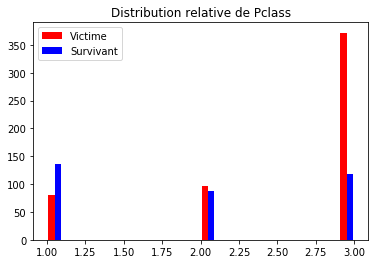

In [16]:
# Compraison des distribution Pclass
def plot_hist(feature, bins=20):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1, x2], label=['Victime', 'Survivant'], bins=bins, color=['r', 'b'])
    plt.legend(loc='upper left')
    plt.title('Distribution relative de %s' %feature)
    plt.show()
plot_hist('Pclass')

In [17]:
def parse_modeld_1(X):
    target = X.Survived
    class_dummies = pd.get_dummies(X['Pclass'], prefix='split_Pclass_')
    #print(class_dummies)
    X = X.join(class_dummies)
   
    to_del = ['Name', 'Age', 'Cabin', 'Embarked', 'Survived', 'Ticket', 'Sex']
    for col in to_del: del X[col]
    print(X)
    return X, target

In [18]:
X, y= parse_modeld_1(train.copy())

             Pclass  SibSp  Parch      Fare  split_Pclass__1  split_Pclass__2  \
PassengerId                                                                     
1                 3      1      0    7.2500                0                0   
2                 1      1      0   71.2833                1                0   
3                 3      0      0    7.9250                0                0   
4                 1      1      0   53.1000                1                0   
5                 3      0      0    8.0500                0                0   
6                 3      0      0    8.4583                0                0   
7                 1      0      0   51.8625                1                0   
8                 3      3      1   21.0750                0                0   
9                 3      0      2   11.1333                0                0   
10                2      1      0   30.0708                0                1   
11                3      1  

In [19]:
print(y)

PassengerId
1      0
2      1
3      1
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     1
13     0
14     0
15     0
16     1
17     0
18     1
19     0
20     1
21     0
22     1
23     1
24     1
25     0
26     1
27     0
28     0
29     1
30     0
      ..
862    0
863    1
864    0
865    0
866    1
867    1
868    0
869    0
870    1
871    0
872    1
873    0
874    0
875    1
876    1
877    0
878    0
879    0
880    1
881    1
882    0
883    0
884    0
885    0
886    0
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64


In [20]:
lr = LogisticRegression()

In [21]:
compute_score(lr, X, y)

0.6926591973081655

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
print(lr.coef_)

[[-0.33284985 -0.14957265  0.23525502  0.00666668  0.21274476  0.26454607
  -0.35822892]]


In [35]:
def parse_model_2(X):
    target = X.Survived
    to_dummy = ['Pclass', 'Sex']
    for dum in to_dummy:
        split_tmp = pd.get_dummies(X[dum], prefix='split_'+dum)
       # print(split_tmp)
        for col in split_tmp:
            X[col] = split_tmp[col]
        del X[dum]
    X['Age'] = X.Age.fillna(X.Age.median())
    
    to_del = ['Name', 'Age', 'Cabin', 'Embarked', 'Survived', 'Ticket']
    for col in to_del: del X[col]
    return X, target

In [26]:
lr = LogisticRegression()

In [27]:
X, y = parse_model_2(train.copy())

In [28]:
compute_score(lr, X, y)

0.79461193345454817

In [29]:
cross_val_score(lr, X, y)

array([ 0.79461279,  0.8013468 ,  0.78787879])

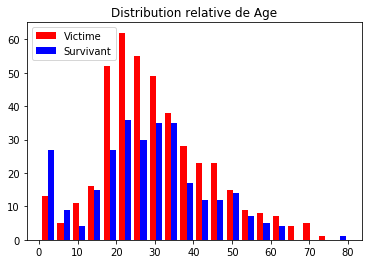

In [30]:
 plot_hist('Age')

In [31]:
def parse_model_2(X):
    target = X.Survived
    to_dummy = ['Pclass', 'Sex']
    for dum in to_dummy:
        split_tmp = pd.get_dummies(X[dum], prefix='split_'+dum)
       # print(split_tmp)
        for col in split_tmp:
            X[col] = split_tmp[col]
        del X[dum]
    X['Age'] = X.Age.fillna(X.Age.median())
    
    X['is_child'] = X.Age < 8
    to_del = ['Name', 'Age', 'Cabin', 'Embarked', 'Survived', 'Ticket']
    for col in to_del: del X[col]
    return X, target

In [32]:
lr = LogisticRegression()

In [33]:
X, y = parse_model_2(train.copy())

In [34]:
compute_score(lr, X, y)

0.80696541972851143

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier()

In [38]:
compute_score(rf, X, y)

0.80479341170095464

In [75]:
def clf_importance(X, clf):
    import pylab as pl
    importances = clf.feature_importances_
    indices = np.argsort(importances[::-1])
    plt.title('Features importance')
    for tree in clf.estimators_:
        plt.plot(range(X.shape[1]), tree.feature_importances_[indices], 'r')
        plt.plot(range(X.shape[1]), importances[indices], 'b')
         
        plt.show()
        
    for f in range(X.shape[1]):
        print("%d. features : %s(%f)"%(f +1, X.columns[indices[f]], importances[indices[f]]))
        
        

In [76]:
rf =RandomForestClassifier()

In [77]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
clf_importance(X, rf)

1. features : split_Pclass_2(0.019095)
2. features : split_Pclass_3(0.049385)
3. features : is_child(0.051406)
4. features : split_Sex_male(0.271768)
5. features : split_Pclass_1(0.032606)
6. features : SibSp(0.042055)
7. features : Fare(0.391390)
8. features : Parch(0.046911)
9. features : split_Sex_female(0.095383)


In [85]:
def parse_model_4(X):
    target = X.Survived
    X['title'] = X.Name.map(lambda x : x.split('.')[1].split('.')[0])
    X['surname'] = X.Name.map(lambda x: '(' in x)
    X['Cabin'] = X.Cabin.map(lambda x: x[0] if not pd.isnull(x) else -1)
    to_dummy = ['Pclass', 'Sex', 'title', 'Embarked', 'Cabin']
    for dum in to_dummy:
        split_feature = pd.get_dummies(X[dum], prefix='split_'+dum)
        X = X.join(split_feature)
        del X[dum]
    X['Age'] = X.Age.fillna(X.Age.median())
    X['is_child'] = X.Age < 8
    to_del = ['Name', 'Survived', 'Ticket']
    for col in to_del: del X[col]
    return X, target
        
    
                            

In [86]:
lr = LogisticRegression()

In [87]:
X, y = parse_model_4(train.copy())

In [88]:
compute_score(lr, X, y)

0.82046753886020463